In [3]:
using Pkg
#Pkg.add("DifferentialEquations")
#Pkg.add("PyPlot")
#Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`


In [1]:
using Plots
gr()
using DifferentialEquations

In [2]:
a=-10;
b=2.2;
c=0.7;
d=-72-7/9;
e=0.0015;

In [3]:
function odefcn(z)
    
    return [  z[1]^2 +   z[1]*z[2] +                       z[2],
            a*z[1]^2 + b*z[1]*z[2] + c*z[2]^2 + d*z[1] + e*z[2]]
end

odefcn (generic function with 1 method)

In [10]:
function rungekutta4(z0, t)
    n = length(t)
    z = zeros((n, length(z0)))
    z[1,:] = z0
    for i in 1:n-1
        h = t[i+1] - t[i]
        k1 = odefcn(z[i,:])
        k2 = odefcn(z[i,:] + k1 * h/2)
        k3 = odefcn(z[i,:] + k2 * h/2)
        k4 = odefcn(z[i,:] + k3 * h)
        z[i+1,:] = z[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    end
    return z
end

rungekutta4 (generic function with 1 method)

In [6]:
t = LinRange(0, 5, 501);
z0 = [1 0];

In [11]:
sol = rungekutta4(z0, t);

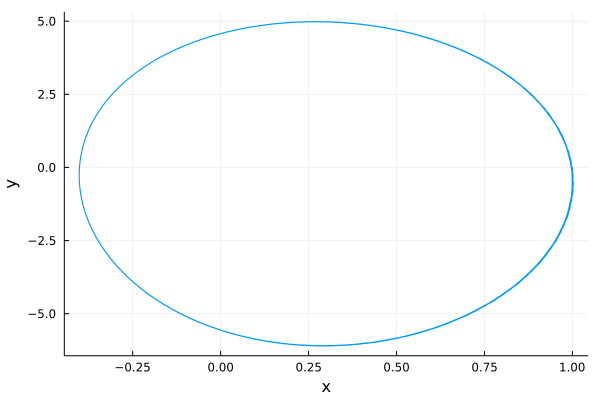

In [12]:
plot(sol[:, 1], sol[:, 2], xaxis="x", yaxis="y", label="")

In [45]:
cat!(a, b) = reshape(append!(vec(a), vec(b)), size(a)[1:end-1]..., :)

cat! (generic function with 1 method)

In [62]:
r = cat!([1.0 0.0; 2.0 3.0],[4.0 8.0])
r = cat!(r, [9.0 -1.0])
r = cat!(r, [9.0 -1.0])
r = cat!(r, [9.0 -1.0])
r[:,3:end]

2×4 Matrix{Float64}:
 4.0   9.0   9.0   9.0
 8.0  -1.0  -1.0  -1.0

In [65]:
mat = reshape([],0,2)

0×2 Matrix{Any}

In [75]:
q = Array{Float64,2}
q[:,1] = [1.0; 0.0]

LoadError: MethodError: no method matching setindex!(::Type{Matrix{Float64}}, ::Vector{Float64}, ::Colon, ::Int64)

In [21]:
test = LinRange(-5, 5, 2)

2-element LinRange{Float64, Int64}:
 -5.0,5.0

In [24]:
sum((test[1:end-1].*test[2:end]) .<= 0)

1

In [79]:
function RK4(z0, h)
    x = Float64[];
    y = Float64[];
    
    push!(x,z0[1]);
    push!(y,z0[2]);
    
    k1 = odefcn([x[1] y[1]]);
    k2 = odefcn([x[1] + k1[1] * h/2, y[1] + k1[2] * h/2]);
    k3 = odefcn([x[1] + k2[1] * h/2, y[1] + k2[2] * h/2]);
    k4 = odefcn([x[1] + k3[1] * h  , y[1] + k3[2] * h  ]);
    
    push!(x, x[1] + (h/6) * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]));
    push!(y, y[1] + (h/6) * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]));
    
    i = 2;
    
    while sum((y[1:end-1].*y[2:end]) .<= 0) < 3
        
        k1 = odefcn([x[i], y[i]]);
        k2 = odefcn([x[i] + k1[1] * h/2, y[i] + k1[2] * h/2]);
        k3 = odefcn([x[i] + k2[1] * h/2, y[i] + k2[2] * h/2]);
        k4 = odefcn([x[i] + k3[1] * h  , y[i] + k3[2] * h  ]);
    
        push!(x, x[i] + (h/6) * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]));
        push!(y, y[i] + (h/6) * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]));
        i=i+1;
        
    end    
    
    return x, y
    
end

RK4 (generic function with 1 method)

In [81]:
h = 0.01;
z0 = [1.0 0.0];
x,y = RK4(z0, h);

74-element Vector{Float64}:
 1.0
 1.0016850867142597
 0.9864991498412249
 0.9547942822234442
 0.9078476746858787
 0.8477240672310308
 0.7770418239520959
 0.6986922924852896
 0.6155665352358999
 0.5303322585041528
 0.44528378054530443
 0.3622676600985833
 0.2826721014692145
 ⋮
 0.39848200341414824
 0.4698368204226258
 0.5430331490390897
 0.6169580134760638
 0.6901606672136807
 0.760838048571895
 0.8268550754736016
 0.8858138443730497
 0.9351821815345485
 0.9724828218890506
 0.9955297640277315
 1.0026808770183486

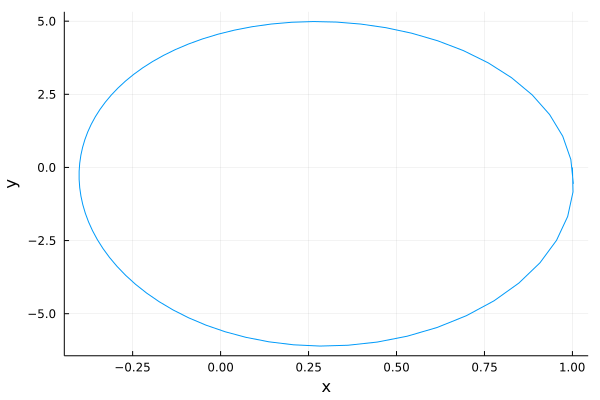

In [88]:
plot(x, y, xaxis="x", yaxis="y", label="")

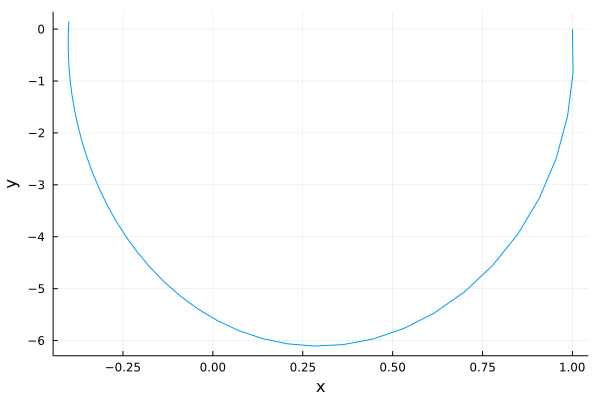

In [87]:
plot(x[1:37], y[1:37], xaxis="x", yaxis="y", label="")

In [61]:
z = Float64[];
push!(z,-3);
push!(z,-2);
push!(z,-1);
push!(z,0);
push!(z,1);
push!(z,2);
push!(z,3);
z[end]

3.0